# Fig S1 BC

In [1]:
import os
import subprocess
import gzip
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

# prepare signal data

In [2]:
stage_dict = {
    'EarlyEmbryogenesis': ['2cell','8cell','Morula','ICM',],
    'PGCsDevelopment': ['E10.5','E13.5_female','E13.5_male',],
    'Spermatogenesis': ['US','DS','PS','RS',],
    'RetinalDevelopment': ['E14.5','E17.5','P0','P3','P7','P10','P14','P21',],
    'HeartDevelopment': ['E10.5','E11.5','E12.5','E13.5','E14.5','E15.5','E16.5','P0',],
    'LiverDevelopment': ['E11.5','E12.5','E13.5','E14.5','E15.5','E16.5','P0']
}


In [3]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization')

In [4]:
C_class_order = {
    'CHM' : 1,
    'CHnonM' : 2,
    'CMnonH' : 3
}

S_class_order = {
    'stable' : 1,
    'stage-specific' : 2
}


In [5]:
process_stage_order = {}
i = 0
for p in stage_dict.keys() :
    for s in stage_dict[p] :
        process_stage_order[f'{p}_{s}'] = i
        i += 1
        

In [7]:
signal_df_dict = {}
for modifi in ['methyl', 'H3K9me3'] :
    signal_df_dict[modifi] = {}
    signal_df_dict[modifi]['C_class'] = []
    signal_df_dict[modifi]['S_class'] = []
    signal_df_dict[modifi]['process_stage'] = []
    signal_df_dict[modifi]['Signal'] = []

    for S_class in ['stable', 'stage-specific'] :
        for process in stage_dict.keys() :
            for stage in stage_dict[process] :
                for C_class in ['CHM', 'CHnonM', 'CMnonH'] :
                    signals_ls = pd.read_csv(f'{process}/{S_class}.{modifi}_{stage}.{C_class}.txt', sep = "\t", header = None)[3].tolist()
                    signal_df_dict[modifi]['Signal'] += signals_ls
                    signal_df_dict[modifi]['C_class'] += [C_class] * len(signals_ls)
                    signal_df_dict[modifi]['S_class'] += [S_class] * len(signals_ls)
                    signal_df_dict[modifi]['process_stage'] += [f"{process}_{stage}"] * len(signals_ls)

    signal_df_dict[modifi] = pd.DataFrame.from_dict(signal_df_dict[modifi])
    signal_df_dict[modifi]['C_process_stage'] = signal_df_dict[modifi]['process_stage'] + '_' + signal_df_dict[modifi]['C_class']
    signal_df_dict[modifi]['C_class_order'] = [C_class_order[x] for x in signal_df_dict[modifi]['C_class']]
    signal_df_dict[modifi]['S_class_order'] = [S_class_order[x] for x in signal_df_dict[modifi]['S_class']]
    signal_df_dict[modifi]['process_stage_order'] = [process_stage_order[x] for x in signal_df_dict[modifi]['process_stage']]
    signal_df_dict[modifi] = signal_df_dict[modifi].sort_values(['process_stage_order', 'C_class', 'S_class'])

In [7]:
for modifi in ['methyl', 'H3K9me3'] :
    signal_df_dict[modifi].to_csv(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/MethK9Signal_box/{modifi}_box.tsv', sep = "\t", index = False)

In [8]:
signal_df_dict = {}
for modifi in ['methyl', 'H3K9me3'] :
    signal_df_dict[modifi] = pd.read_csv(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/MethK9Signal_box/{modifi}_box.tsv', sep = "\t")

In [9]:
signal_df_dict['methyl']

,C_class,S_class,process_stage,Signal,C_process_stage,C_class_order,S_class_order,process_stage_order
0,CHM,stable,EarlyEmbryogenesis_2cell,0.764706,EarlyEmbryogenesis_2cell_CHM,1,1,0
1,CHM,stable,EarlyEmbryogenesis_2cell,0.646341,EarlyEmbryogenesis_2cell_CHM,1,1,0
2,CHM,stable,EarlyEmbryogenesis_2cell,0.746193,EarlyEmbryogenesis_2cell_CHM,1,1,0
3,CHM,stable,EarlyEmbryogenesis_2cell,0.775862,EarlyEmbryogenesis_2cell_CHM,1,1,0
4,CHM,stable,EarlyEmbryogenesis_2cell,0.776163,EarlyEmbryogenesis_2cell_CHM,1,1,0
...,...,...,...,...,...,...,...,...
5536479,CMnonH,stage-specific,LiverDevelopment_P0,0.909722,LiverDevelopment_P0_CMnonH,3,2,33
5536480,CMnonH,stage-specific,LiverDevelopment_P0,0.871212,LiverDevelopment_P0_CMnonH,3,2,33
5536481,CMnonH,stage-specific,LiverDevelopment_P0,0.787554,LiverDevelopment_P0_CMnonH,3,2,33
5536482,CMnonH,stage-specific,LiverDevelopment_P0,0.522788,LiverDevelopment_P0_CMnonH,3,2,33


# box plot

## CHM only

In [2]:
import scipy
print(scipy.__version__)


1.5.4


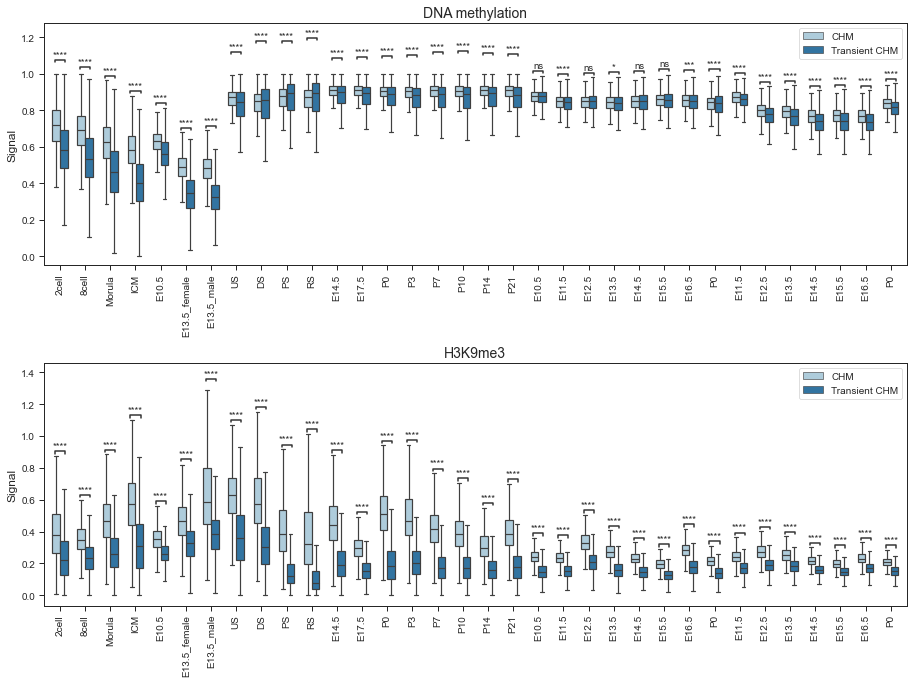

In [18]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(2,1, figsize = (6.4 * 2, 4.8 * 2), tight_layout = True)
#     for i,modifi in enumerate(['methyl']) :
    for i,modifi in enumerate(['methyl', 'H3K9me3']) :
        ax = axes[i]
        df = signal_df_dict[modifi].loc[signal_df_dict[modifi]['C_class'] == 'CHM']
        b = sns.boxplot(
            data = df,
            x = 'process_stage',
            y = 'Signal',
            ax = ax,
            hue = 'S_class',
            showfliers = False,
            width = .618,
            palette = 'Paired'
            
        )
        add_stat_annotation(ax, data=df, x='process_stage', y='Signal', hue='S_class',
                    box_pairs=[((x.get_text(), 'stable'), (x.get_text(), 'stage-specific')) for x in ax.get_xticklabels()],
                    use_fixed_offset=False,
                    line_offset_to_box=0.01,
                    line_offset=0,
                    line_height=0.01, 
                    text_offset=1,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
        
        ax.set_xticks(ax.get_xticks())
        xticklabels = ['_'.join(x.get_text().split('_')[1:]) for x in ax.get_xticklabels()]
        ax.set_xticklabels(xticklabels, rotation = 90, ha = 'center', va = 'top')
        title = modifi if modifi == 'H3K9me3' else 'DNA methylation'
        ax.set_title(title)
        ax.set_xlabel('')
        b.legend_.set_title(None)
        new_labels = ['CHM', 'Transient CHM']
        for t, l in zip(b.legend_.texts, new_labels):
            t.set_text(l)
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make5_box_methyl_K9_signal_CHM.pdf', transparent = True, bbox_inches='tight')
        

## CHM CHnonM CMnonH (not used)

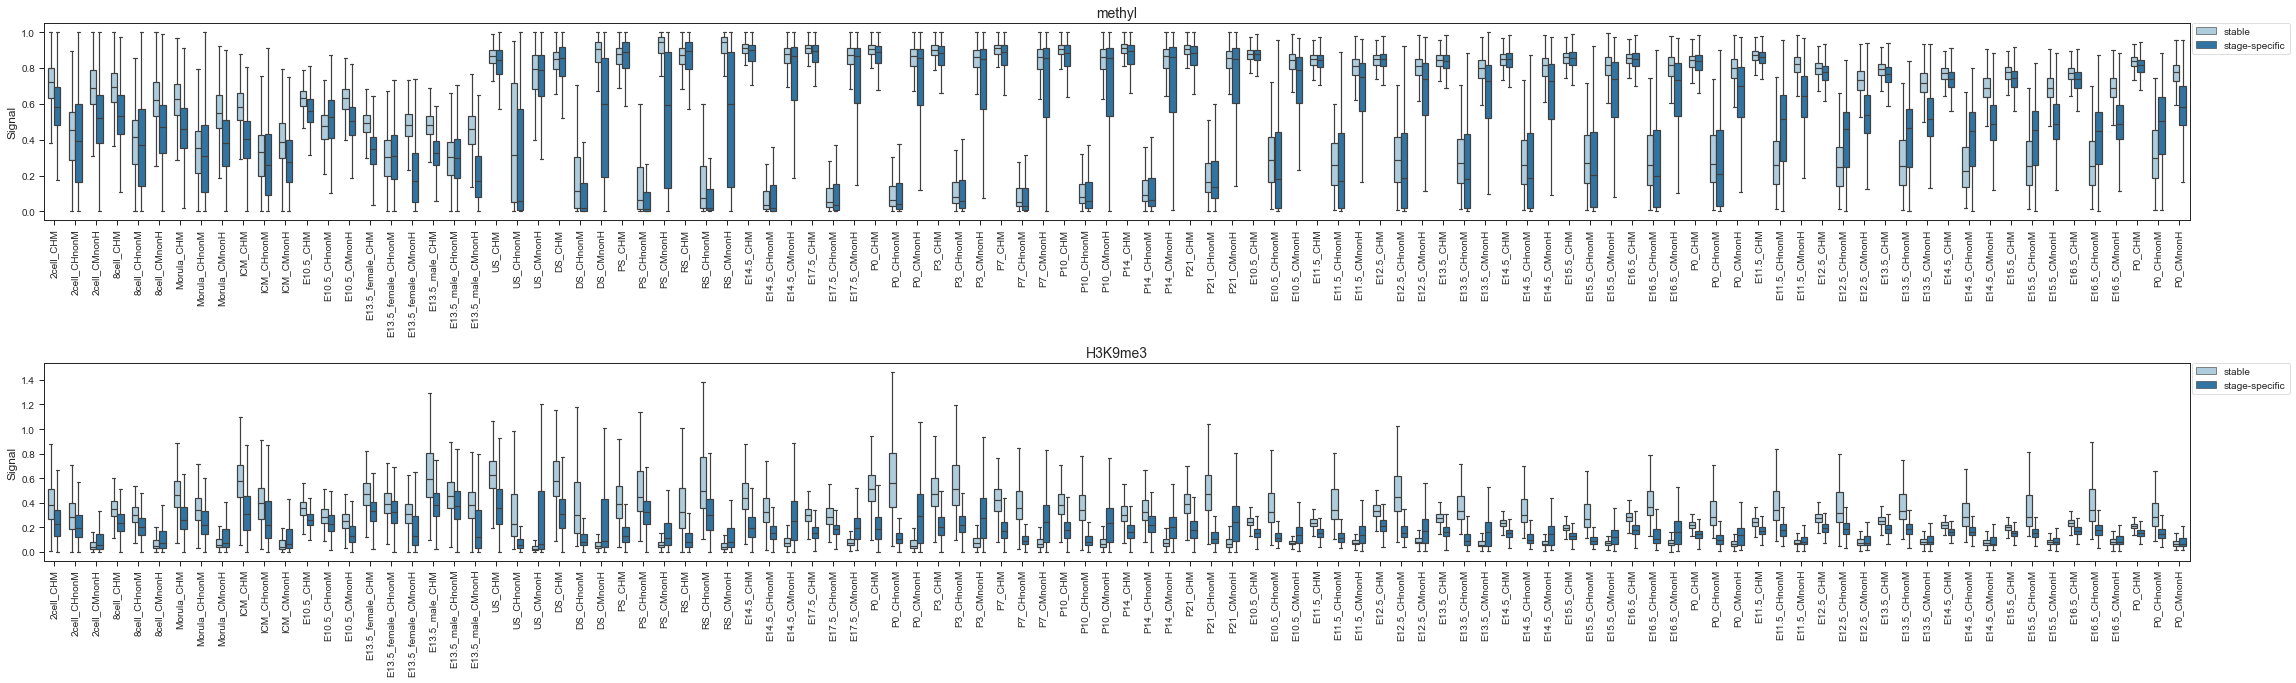

In [77]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(2,1, figsize = (6.4 * 5, 4.8 * 2), tight_layout = True)
    for i,modifi in enumerate(['methyl', 'H3K9me3']) :
        ax = axes[i]
        df = signal_df_dict[modifi]

        
        b = sns.boxplot(
            data = df,
            x = 'C_process_stage',
            y = 'Signal',
            ax = ax,
            hue = 'S_class',
            showfliers = False,
            width = .618,
            palette = sns.color_palette("Paired", 6)
            
        )
        ax.set_xticks(ax.get_xticks())
        xticklabels = ['_'.join(x.get_text().split('_')[1:]) for x in ax.get_xticklabels()]
#         xticklabels = ax.get_xticklabels()
        ax.set_xticklabels(xticklabels, rotation = 90, ha = 'center', va = 'top')
        ax.set_title(modifi)
        ax.set_xlabel('')
        b.legend_.set_title(None)
        ax.legend(bbox_to_anchor=(1.001, 1), loc='upper left', borderaxespad=0)
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make5_box_methyl_k9_signal_CHM_CHnonM_CMnonH.pdf', transparent = True)
        
        

In [71]:
sns.color_palette("Paired", 6)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745)]

In [119]:
from statannot import add_stat_annotation